In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
import os                                                      #Taking Current Directory
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
testing_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

In [17]:
training_set =  tf.keras.utils.image_dataset_from_directory(                #Importing data in training_set
    train_path,               
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear",
    )


Found 900 files belonging to 3 classes.


In [18]:
training_set.class_names                                                       #Seeing my classes in training_set

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
validation_set =  tf.keras.utils.image_dataset_from_directory(                   #Importing data in validation_set
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear",
    )

Found 300 files belonging to 3 classes.


CNN MODEL

In [20]:
cnn = tf.keras.models.Sequential()                                                                        #Creating various layers with 32features, 64features, so on

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3,  activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size = 3,  activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size = 3,  activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size = 3,  activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size = 3,  activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())                                                                          #Converting 3D image to 1D
cnn.add(tf.keras.layers.Dense(units = 1500, activation = 'relu'))                                           #Gives positive output or else 0
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))                                           #Takes highest probability image for output



In [21]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])                     #While using softmax, categorical_crossentropy works better, 0.0001 is training rate

In [22]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [23]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 [==============================] - 30s 874ms/step - loss: 1.1150 - accuracy: 0.4278 - val_loss: 0.9086 - val_accuracy: 0.5133
Epoch 2/10
29/29 [==============================] - 26s 914ms/step - loss: 0.6959 - accuracy: 0.6711 - val_loss: 0.5311 - val_accuracy: 0.7267
Epoch 3/10
29/29 [==============================] - 27s 921ms/step - loss: 0.6165 - accuracy: 0.7144 - val_loss: 0.6080 - val_accuracy: 0.7700
Epoch 4/10
29/29 [==============================] - 28s 951ms/step - loss: 0.4763 - accuracy: 0.7989 - val_loss: 0.4284 - val_accuracy: 0.8167
Epoch 5/10
29/29 [==============================] - 28s 980ms/step - loss: 0.3377 - accuracy: 0.8778 - val_loss: 0.3040 - val_accuracy: 0.8800
Epoch 6/10
29/29 [==============================] - 29s 1s/step - loss: 0.2398 - accuracy: 0.9000 - val_loss: 0.1841 - val_accuracy: 0.9367
Epoch 7/10
29/29 [==============================] - 30s 1s/step - loss: 0.2373 - accuracy: 0.8978 - val_loss: 0.2600 - val_accuracy: 0.8933
Epoch

In [24]:
train_loss, train_acc = cnn.evaluate(training_set)
print("Training accuracy", train_acc)

29/29 [==============================] - 8s 279ms/step - loss: 0.0387 - accuracy: 0.9889
Training accuracy 0.9888888597488403


In [25]:
val_loss, val_acc = cnn.evaluate(validation_set)
print("Validation accuracy", val_acc)

10/10 [==============================] - 3s 268ms/step - loss: 0.1022 - accuracy: 0.9633
Validation accuracy 0.9633333086967468


In [27]:
training_history.history

{'loss': [1.1150206327438354,
  0.6959195733070374,
  0.6164888739585876,
  0.4762924611568451,
  0.3376995027065277,
  0.23976482450962067,
  0.23733647167682648,
  0.2296876460313797,
  0.19034208357334137,
  0.08736087381839752],
 'accuracy': [0.4277777671813965,
  0.6711111068725586,
  0.7144444584846497,
  0.7988888621330261,
  0.8777777552604675,
  0.8999999761581421,
  0.897777795791626,
  0.9144444465637207,
  0.9322222471237183,
  0.9688888788223267],
 'val_loss': [0.9085718989372253,
  0.531133234500885,
  0.6079868078231812,
  0.4284483790397644,
  0.3040445148944855,
  0.18413864076137543,
  0.26000967621803284,
  0.24951820075511932,
  0.15298858284950256,
  0.1022268608212471],
 'val_accuracy': [0.5133333206176758,
  0.7266666889190674,
  0.7699999809265137,
  0.8166666626930237,
  0.8799999952316284,
  0.9366666674613953,
  0.8933333158493042,
  0.8899999856948853,
  0.9300000071525574,
  0.9633333086967468]}

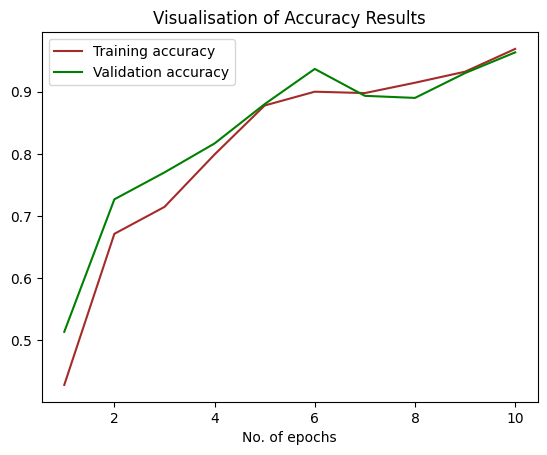

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'brown', label = 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'green', label = 'Validation accuracy')
plt.xlabel('No. of epochs')
plt.title("Visualisation of Accuracy Results")
plt.legend()
plt.show()